## 2015.01 - 2018.06

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
import koreanize_matplotlib

In [162]:
from glob import glob
print(glob('data/*.csv'))

['data/201601_201606_연령별인구현황_월간.csv', 'data/201501_201506_연령별인구현황_월간.csv', 'data/201607_201612_연령별인구현황_월간.csv', 'data/201507_201512_연령별인구현황_월간.csv', 'data/201801_201806_연령별인구현황_월간.csv', 'data/201707_201712_연령별인구현황_월간.csv', 'data/201701_201706_연령별인구현황_월간.csv']


In [163]:
file_names = sorted(glob('data/*'))
file_names

['data/201501_201506_연령별인구현황_월간.csv',
 'data/201507_201512_연령별인구현황_월간.csv',
 'data/201601_201606_연령별인구현황_월간.csv',
 'data/201607_201612_연령별인구현황_월간.csv',
 'data/201701_201706_연령별인구현황_월간.csv',
 'data/201707_201712_연령별인구현황_월간.csv',
 'data/201801_201806_연령별인구현황_월간.csv']

In [164]:
df_1 = pd.read_csv(file_names[0], encoding = "cp949")
df_2 = pd.read_csv(file_names[1], encoding = "cp949")
df_3 = pd.read_csv(file_names[2], encoding = "cp949")
df_4 = pd.read_csv(file_names[3], encoding = "cp949")
df_5 = pd.read_csv(file_names[4], encoding = "cp949")
df_6 = pd.read_csv(file_names[5], encoding = "cp949")
df_7 = pd.read_csv(file_names[6], encoding = "cp949")

In [165]:
df_1.sample()

,행정구역,2015년01월_계_총인구수,2015년01월_계_연령구간인구수,2015년01월_계_0~9세,2015년01월_계_10~19세,2015년01월_계_20~29세,2015년01월_계_30~39세,2015년01월_계_40~49세,2015년01월_계_50~59세,2015년01월_계_60~69세,...,2015년06월_계_10~19세,2015년06월_계_20~29세,2015년06월_계_30~39세,2015년06월_계_40~49세,2015년06월_계_50~59세,2015년06월_계_60~69세,2015년06월_계_70~79세,2015년06월_계_80~89세,2015년06월_계_90~99세,2015년06월_계_100세 이상
2,부산광역시 (2600000000),"3,517,898","3,517,898","263,747","365,123","455,687","503,003","576,949","628,752","404,630",...,"356,680","456,347","498,604","573,651","623,045","417,140","239,962","75,987","9,125","1,446"


In [166]:
df_1 = df_1.melt(id_vars = '행정구역', var_name = '기간', value_name = '인구수')
df_2 = df_2.melt(id_vars = '행정구역', var_name = '기간', value_name = '인구수')
df_3 = df_3.melt(id_vars = '행정구역', var_name = '기간', value_name = '인구수')
df_4 = df_4.melt(id_vars = '행정구역', var_name = '기간', value_name = '인구수')
df_5 = df_5.melt(id_vars = '행정구역', var_name = '기간', value_name = '인구수')
df_6 = df_6.melt(id_vars = '행정구역', var_name = '기간', value_name = '인구수')
df_7 = df_7.melt(id_vars = '행정구역', var_name = '기간', value_name = '인구수')

In [167]:
df_1.sample()

,행정구역,기간,인구수
1246,인천광역시 (2800000000),2015년06월_계_20~29세,"400,379"


In [168]:
df_2.sample()

,행정구역,기간,인구수
591,경상북도 (4700000000),2015년09월_계_40~49세,"430,724"


In [170]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7])
df.to_csv('201501_201806_전처리전.csv', index = False)

In [34]:
df['지역코드'] = df['행정구역'].str[-11:-1]
df.head()

,행정구역,기간,인구수,지역코드
0,전국 (0000000000),2015년01월_계_총인구수,"51,342,881",0000000000
1,서울특별시 (1100000000),2015년01월_계_총인구수,"10,104,515",1100000000
2,부산광역시 (2600000000),2015년01월_계_총인구수,"3,517,898",2600000000
3,대구광역시 (2700000000),2015년01월_계_총인구수,"2,492,658",2700000000
4,인천광역시 (2800000000),2015년01월_계_총인구수,"2,904,876",2800000000


In [43]:
df['연도'] = df['기간'].map(lambda x : int(x.split('_')[0][:4]))
df['월'] = df['기간'].map(lambda x : int(x.split('_')[0][-3:-1]))
df.sample(3)

,행정구역,기간,인구수,지역코드,연도,월
355,전라북도 (4500000000),2015년08월_계_40~49세,"301,827",4500000000,2015,8
1358,세종특별자치시 (3600000000),2017년06월_계_80~89세,"5,521",3600000000,2017,6
1297,서울특별시 (1100000000),2015년06월_계_50~59세,"1,592,373",1100000000,2015,6


In [46]:
df['연령대'] = df['기간'].map(lambda x : x.split('_')[-1])
df.sample(4)

,행정구역,기간,인구수,지역코드,연도,월,연령대
676,강원도 (4200000000),2017년03월_계_90~99세,"8,277",4200000000,2017,3,90~99세
60,대전광역시 (3000000000),2018년01월_계_10~19세,"167,350",3000000000,2018,1,10~19세
269,제주특별자치도 (5000000000),2015년08월_계_연령구간인구수,"618,447",5000000000,2015,8,연령구간인구수
301,전라북도 (4500000000),2017년08월_계_10~19세,"201,911",4500000000,2017,8,10~19세


In [52]:
df['행정구역'] = df['행정구역'].str.replace('[^가-힣]', '', regex = True).str.strip()
df.sample(3)

,행정구역,기간,인구수,지역코드,연도,월,연령대
600,대전광역시,2017년03월_계_50~59세,"240,057",3000000000,2017,3,50~59세
516,충청남도,2016년03월_계_0~9세,"197,300",4400000000,2016,3,0~9세
238,인천광역시,2015년02월_계_총인구수,"2,906,603",2800000000,2015,2,총인구수


In [55]:
columns = ['행정구역', '지역코드', '연도', '월', '연령대', '인구수']
df = df[columns]
df.sample(10)

,행정구역,지역코드,연도,월,연령대,인구수
1002,충청남도,4400000000,2015,5,10~19세,"233,557"
901,서울특별시,1100000000,2016,4,90~99세,"30,374"
733,전라북도,4500000000,2015,10,연령구간인구수,"1,869,297"
748,강원도,4200000000,2017,10,0~9세,"117,382"
1358,세종특별자치시,3600000000,2016,12,80~89세,"5,219"
973,서울특별시,1100000000,2017,5,0~9세,"750,415"
699,경상북도,4700000000,2017,3,100세 이상,805
1316,부산광역시,2600000000,2015,12,60~69세,"432,899"
484,경상남도,4800000000,2016,3,총인구수,"3,365,021"
770,전라남도,4600000000,2017,10,10~19세,"192,542"


In [58]:
df = df.loc[(df['행정구역'] != '전국') & (df['연령대'] != '연령구간인구수') & (df['연령대'] != '총인구수')]
df['연령대'].value_counts()

0~9세       714
10~19세     714
20~29세     714
30~39세     714
40~49세     714
50~59세     714
60~69세     714
70~79세     714
80~89세     714
90~99세     714
100세 이상    714
Name: 연령대, dtype: int64

In [ ]:
df = df.drop('지역코드', axis = 1).reset_index(drop = True)

In [71]:
df['인구수'] = df['인구수'].str.replace('[^0-9]', '', regex = True).astype(int)
df.head(2)

,행정구역,연도,월,연령대,인구수
0,서울특별시,2015,1,0~9세,792353
1,부산광역시,2015,1,0~9세,263747


In [146]:
df.head()

,행정구역,연도,월,연령대,인구수
0,서울특별시,2015,1,0~9세,792353
1,부산광역시,2015,1,0~9세,263747
2,대구광역시,2015,1,0~9세,208324
3,인천광역시,2015,1,0~9세,269998
4,광주광역시,2015,1,0~9세,144939


In [79]:
df['연도'].unique()

array([2015, 2016, 2017, 2018])

In [145]:
df['행정구역'].value_counts()

서울특별시      462
강원도        462
경상남도       462
경상북도       462
전라남도       462
전라북도       462
충청남도       462
충청북도       462
경기도        462
부산광역시      462
세종특별자치시    462
울산광역시      462
대전광역시      462
광주광역시      462
인천광역시      462
대구광역시      462
제주특별자치도    462
Name: 행정구역, dtype: int64

In [151]:
df.to_csv('data/201501_201806.csv', index = False)

In [152]:
pd.read_csv('data/201501_201806.csv')

,행정구역,연도,월,연령대,인구수
0,서울특별시,2015,1,0~9세,792353
1,부산광역시,2015,1,0~9세,263747
2,대구광역시,2015,1,0~9세,208324
3,인천광역시,2015,1,0~9세,269998
4,광주광역시,2015,1,0~9세,144939
...,...,...,...,...,...
7849,전라북도,2018,6,100세 이상,721
7850,전라남도,2018,6,100세 이상,773
7851,경상북도,2018,6,100세 이상,828
7852,경상남도,2018,6,100세 이상,675


array([[<AxesSubplot:title={'center':'연도'}>,
        <AxesSubplot:title={'center':'월'}>],
       [<AxesSubplot:title={'center':'인구수'}>, <AxesSubplot:>]],
      dtype=object)

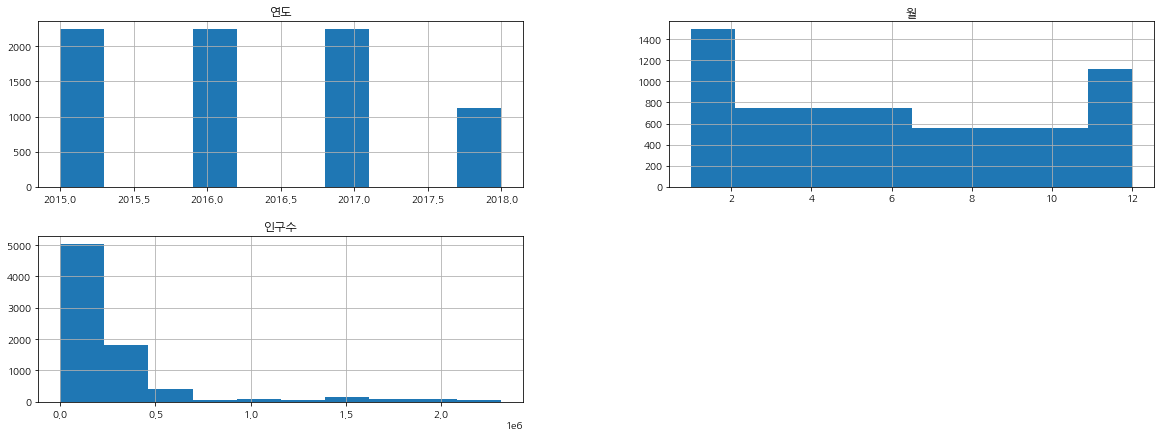

In [84]:
df.hist(figsize = (20, 7))

In [101]:
pd.crosstab(df['연령대'], df['행정구역'], aggfunc = "sum", values = df['인구수']).T.style.background_gradient(cmap = "summer_r")

연령대,0~9세,100세 이상,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세
행정구역,,,,,,,,,,,
강원도,5069813,26898,6940353,7715958,7804319,10357802,11345040,7583663,5593034,2224087,338197
경기도,52147545,133563,61046802,70285951,82167943,96927523,84387559,45901069,26921818,10528711,1480063
경상남도,13168913,25995,15654354,16589402,19645664,24123165,23488538,14922170,9249409,4115790,488326
경상북도,9251459,32598,11245813,12912704,14284955,17735079,19260119,13846323,9642435,4449702,567351
광주광역시,5902321,14097,7984674,8447183,9038863,10776326,9290900,5523414,3334152,1265470,173126
대구광역시,8635282,24092,11689810,13818894,14101332,18119369,17718055,11145220,6394020,2400949,271021
대전광역시,5937218,12588,7487617,8920397,9408894,11084643,10038144,5937760,3286203,1299651,174435
부산광역시,11095988,64657,13914350,19081111,20343797,23471974,25713308,18807406,10413865,3551398,434306
서울특별시,31956714,221529,39894380,60901097,68665953,70627307,66156531,44760140,25388577,8614591,1314465


<AxesSubplot:xlabel='행정구역'>

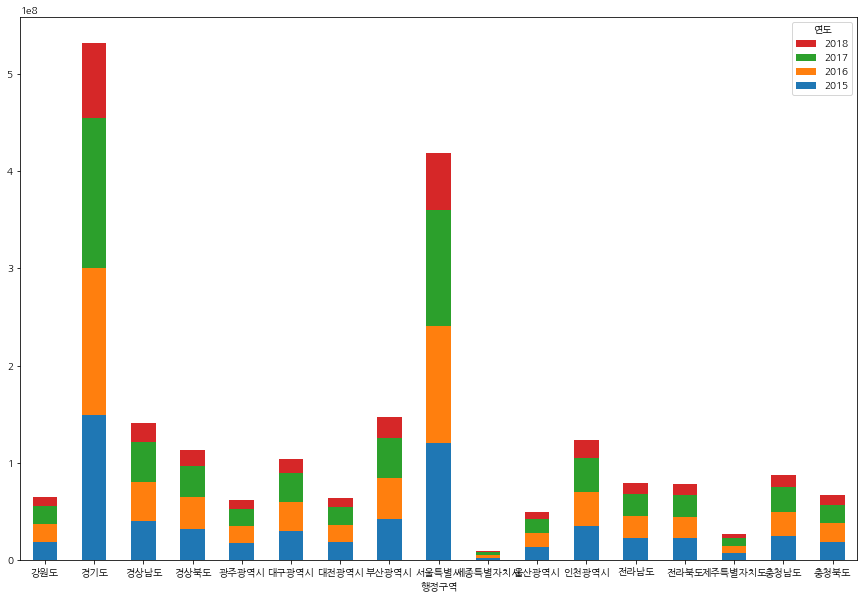

In [98]:
pd.crosstab(df['연도'], df['행정구역'], aggfunc = "sum", values = df['인구수']).T.plot(kind = 'bar', rot = 0, stacked = True, figsize = (15, 10), legend = 'reverse')

<AxesSubplot:xlabel='행정구역'>

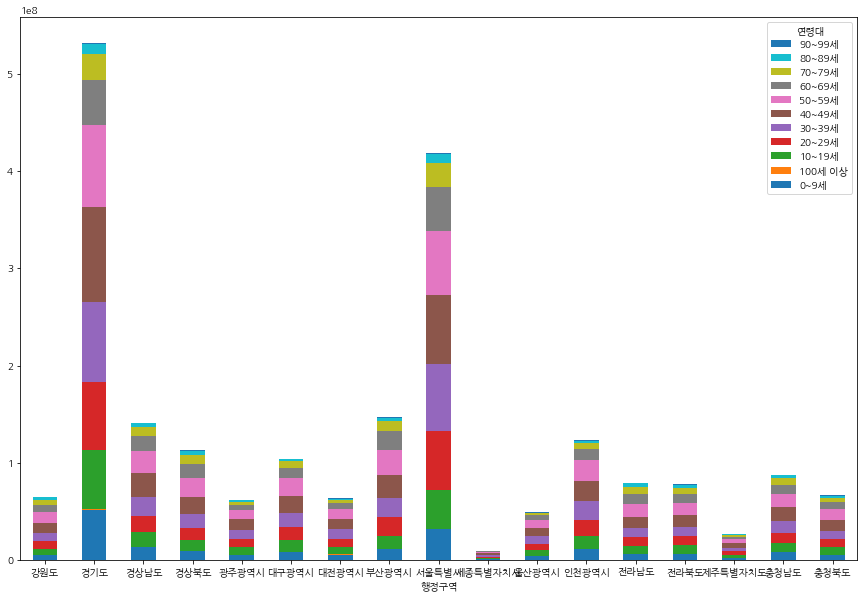

In [99]:
pd.crosstab(df['연령대'], df['행정구역'], aggfunc = "sum", values = df['인구수']).T.plot(kind = 'bar', rot = 0, stacked = True, figsize = (15, 10), legend = 'reverse')

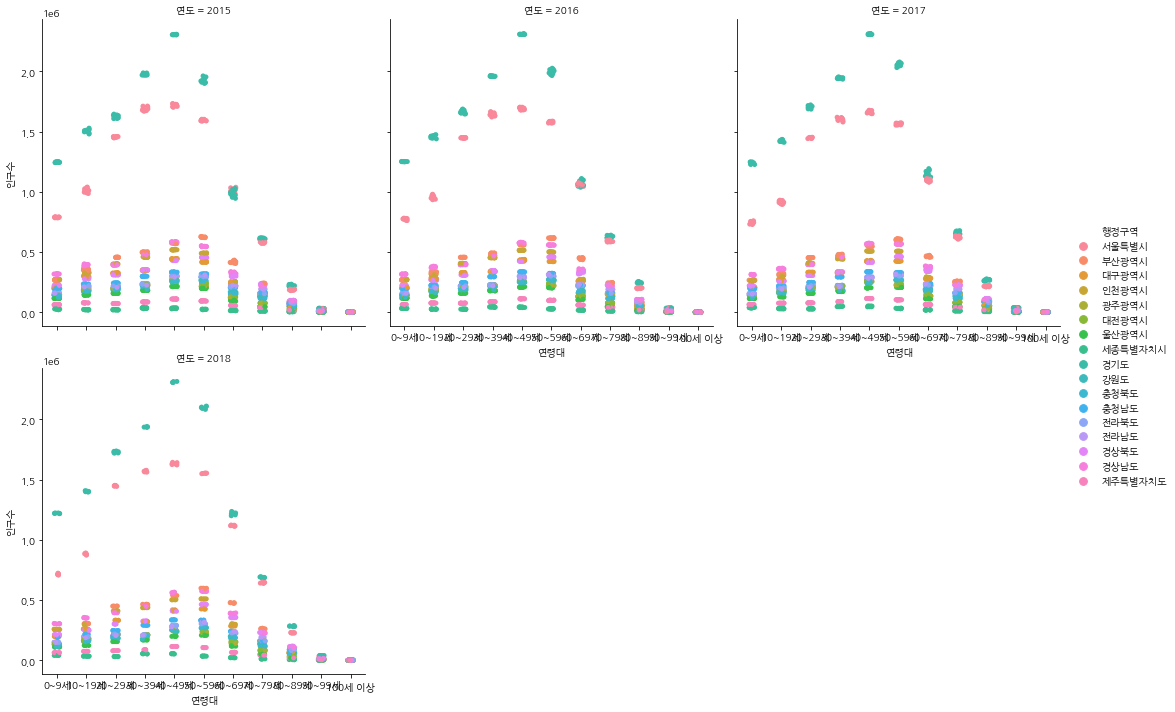

In [135]:
# plt.figure(figsize = (10,5))
sns.catplot(data = df, x = '연령대', y = '인구수', hue = '행정구역', col = '연도', col_wrap = 3, ci = None)

<Figure size 1152x576 with 0 Axes>

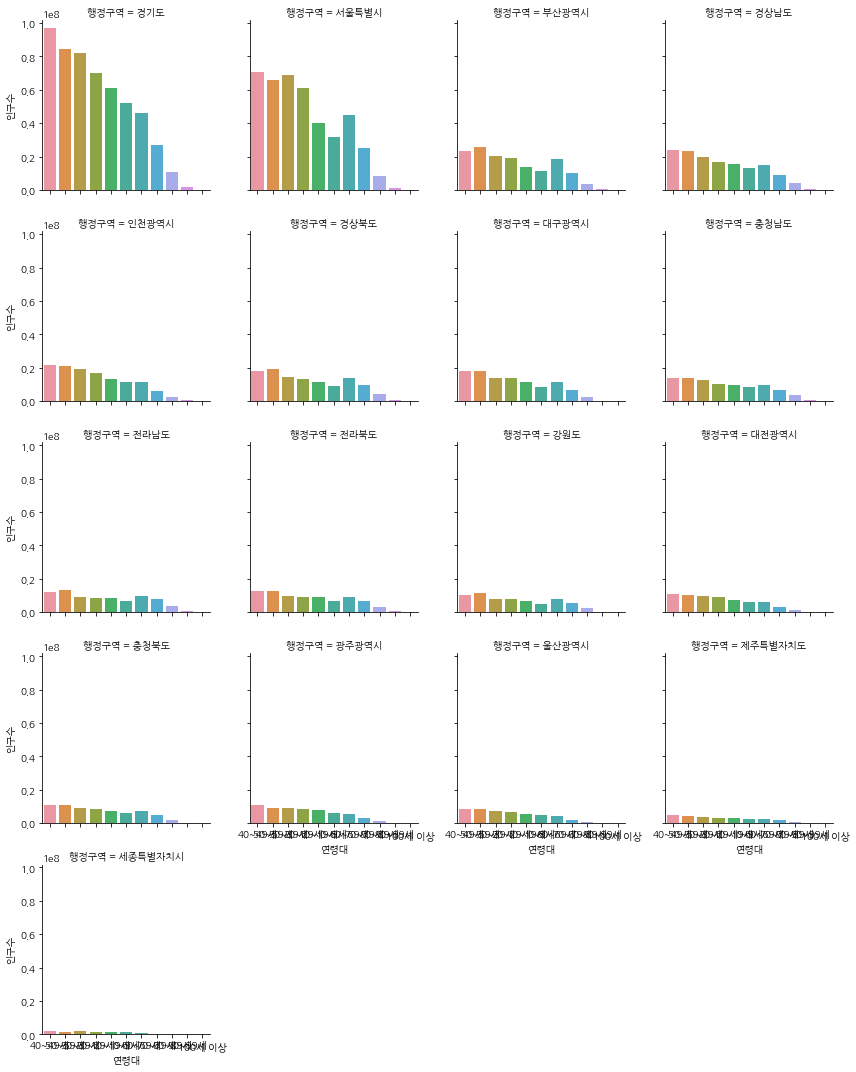

In [161]:
plt.figure(figsize = (16,8))
sns.catplot(data = df.sort_values('인구수', ascending = False), x = '연령대', y = '인구수', col = '행정구역', kind = 'bar', estimator = np.sum, height = 3, col_wrap = 4, ci = None)
plt.show()

In [103]:
pd.pivot_table(data = df, index = '행정구역', columns = '연령대', values = '인구수', aggfunc = 'sum').style.bar()

연령대,0~9세,100세 이상,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세
행정구역,,,,,,,,,,,
강원도,5069813,26898,6940353,7715958,7804319,10357802,11345040,7583663,5593034,2224087,338197
경기도,52147545,133563,61046802,70285951,82167943,96927523,84387559,45901069,26921818,10528711,1480063
경상남도,13168913,25995,15654354,16589402,19645664,24123165,23488538,14922170,9249409,4115790,488326
경상북도,9251459,32598,11245813,12912704,14284955,17735079,19260119,13846323,9642435,4449702,567351
광주광역시,5902321,14097,7984674,8447183,9038863,10776326,9290900,5523414,3334152,1265470,173126
대구광역시,8635282,24092,11689810,13818894,14101332,18119369,17718055,11145220,6394020,2400949,271021
대전광역시,5937218,12588,7487617,8920397,9408894,11084643,10038144,5937760,3286203,1299651,174435
부산광역시,11095988,64657,13914350,19081111,20343797,23471974,25713308,18807406,10413865,3551398,434306
서울특별시,31956714,221529,39894380,60901097,68665953,70627307,66156531,44760140,25388577,8614591,1314465


In [108]:
df.groupby(by = ['행정구역', '연령대'])[['인구수']].sum()

인구수
행정구역 연령대              
강원도  0~9세      5069813
     100세 이상     26898
     10~19세    6940353
     20~29세    7715958
     30~39세    7804319
...                ...
충청북도 50~59세   11050967
     60~69세    7049946
     70~79세    4838492
     80~89세    2138981
     90~99세     268673

[187 rows x 1 columns]

In [119]:
df.groupby(by = ['행정구역', '연령대'])['인구수'].sum().unstack()

연령대,0~9세,100세 이상,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세
행정구역,,,,,,,,,,,
강원도,5069813,26898,6940353,7715958,7804319,10357802,11345040,7583663,5593034,2224087,338197
경기도,52147545,133563,61046802,70285951,82167943,96927523,84387559,45901069,26921818,10528711,1480063
경상남도,13168913,25995,15654354,16589402,19645664,24123165,23488538,14922170,9249409,4115790,488326
경상북도,9251459,32598,11245813,12912704,14284955,17735079,19260119,13846323,9642435,4449702,567351
광주광역시,5902321,14097,7984674,8447183,9038863,10776326,9290900,5523414,3334152,1265470,173126
대구광역시,8635282,24092,11689810,13818894,14101332,18119369,17718055,11145220,6394020,2400949,271021
대전광역시,5937218,12588,7487617,8920397,9408894,11084643,10038144,5937760,3286203,1299651,174435
부산광역시,11095988,64657,13914350,19081111,20343797,23471974,25713308,18807406,10413865,3551398,434306
서울특별시,31956714,221529,39894380,60901097,68665953,70627307,66156531,44760140,25388577,8614591,1314465


In [111]:
df.groupby(by = ['행정구역', '연령대'])['인구수'].describe()

count           mean           std       min        25%  \
행정구역 연령대                                                                
강원도  0~9세      42.0  120709.833333   3047.726725  114581.0  118509.50   
     100세 이상   42.0     640.428571     43.856831     560.0     606.50   
     10~19세    42.0  165246.500000   7462.561354  153344.0  158842.50   
     20~29세    42.0  183713.285714    950.283893  181364.0  183377.75   
     30~39세    42.0  185817.119048   4700.163107  177312.0  182091.00   
...             ...            ...           ...       ...        ...   
충청북도 50~59세    42.0  263118.261905   4153.329115  255394.0  259466.00   
     60~69세    42.0  167855.857143  12055.112092  147690.0  157211.50   
     70~79세    42.0  115202.190476   1077.342264  113349.0  114279.50   
     80~89세    42.0   50928.119048   3942.721297   44101.0   47308.50   
     90~99세    42.0    6396.976190    509.814050    5591.0    6009.00   

                   50%       75%       max  
행정구역 연령대                                    
강원도  0~9세     121821.0  123257.0  124196.0  
     100세 이상     644.0     673.5     705.0  
     10~19세   164904.5  171790.0  177970.0  
     20~29세   183693.5  184369.0  185914.0  
     30~39세   186463.0  189968.5  193755.0  
...                ...       ...       ...  
충청북도 50~59세   263569.5  266563.5  269092.0  
     60~69세   167584.5  177546.5  187709.0  
     70~79세   115243.5  115935.5  117320.0  
     80~89세    50888.0   54140.0   57179.0  
     90~99세     6278.5    6830.5    7308.0  

[187 rows x 8 columns]

In [157]:
from glob import glob
file_names = glob('*.csv')
file_names

['200801_201106.csv', '201501_201806.csv', '201807_202112.csv']